# Eric Keenan Lab and Homework 6: GRACE observations of ice sheet mass balance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
from scipy import stats

# Load data

In [2]:
# Ice sheet mass balance
mb_time = np.loadtxt("ice_sheet_mass_balance_timeseries.txt", delimiter=',', \
                     dtype='str', usecols=0).astype(np.float)
mb_g, mb_gu, mb_a, mb_au = np.loadtxt("ice_sheet_mass_balance_timeseries.txt", \
                                      delimiter=',', \
                                      usecols=(1,2,5,6), unpack=True, )

# Greenland mass balance components
g_time = np.loadtxt("Greenland_mass_balance_components.txt", delimiter=',', \
                    dtype='str', \
                    usecols=0).astype(np.float)
gd, gsmb = np.loadtxt("Greenland_mass_balance_components.txt", delimiter=',', \
                      usecols=(1,2), unpack=True)

# Problem 1. 
### The timeseries shows the accumulated mass change for each ice sheet since the begining of the record. Positive values indicate the ice sheet has gained mass therefore lowering sea level, while negative values mean the ice sheet has lost mass thus contributing to sea level rise.

# Problem 2
### Greenland Mass Balance Trend = -277 Gt/yr, equivalent to 0.77 mm sea level rise per year. 
### Antarctica Mass Balance Trend = -123 Gt/yr, equivalent to 0.34 mm sea level rise per year. 
### Assuming 1 mm sea level rise is equivalent to 362 Gt (http://www.antarcticglaciers.org/glaciers-and-climate/estimating-glacier-contribution-to-sea-level-rise/). 
### These numbers are uncertain for at least three reasons: 1.) Glacial isostatic adjustment is modeled, not meausred. 2.) Spatial resolution of GRACE is ~300 km, thus mass from the area of interest can leak out of the measurement or mass from an adjacent area to the area of interest can leake in. 3.) Earth processes the regularly redistribute mass (such as oceanic tides) must be accounted for with models. These models have their own uncertainties which propogate into GRACE uncertainties. 
### Greenland has lost approximately twice as much mass as Antarctica despite being roughly an order of magnitude smaller. Greenland also has a more pronounced annual cycle in mass balance, perhaps due to large summer time meltwater runoff. Antarctica has more years than Greenland where the ice sheet appears to have gained mass. 


-277.2155924316179
-123.45446750509034
0.7657889293691102
0.3410344406217965


Text(0, 0.5, 'Gt')

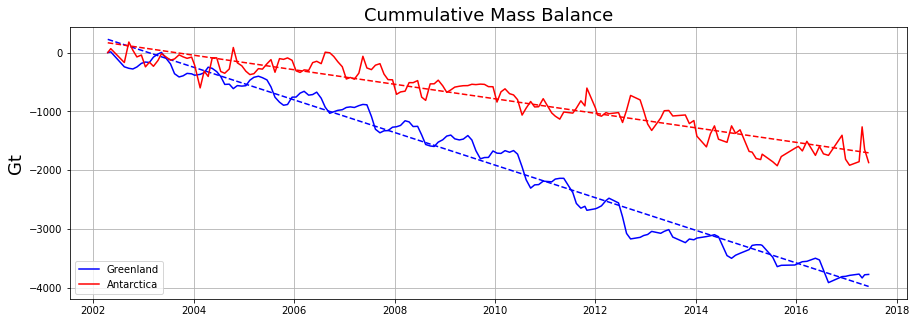

In [3]:
# Calculate linear trends
g_slope, g_intercept, g_r_value, g_p_value, g_std_err = \
    stats.linregress(mb_time, mb_g)
a_slope, a_intercept, a_r_value, a_p_value, a_std_err = \
    stats.linregress(mb_time, mb_a)
print(g_slope)
print(a_slope)

# Calculate sea level rise rates
Gt_2_mm_slr = 362
print(-g_slope / Gt_2_mm_slr)
print(-a_slope / Gt_2_mm_slr)

# Plot linear trends
g_trend = g_intercept + mb_time * g_slope
a_trend = a_intercept + mb_time * a_slope
fig = plt.figure(figsize=(15,5))
plt.plot(mb_time, mb_g, 'b', label='Greenland')
plt.plot(mb_time, g_trend, 'b--')
plt.plot(mb_time, mb_a, 'r', label='Antarctica')
plt.plot(mb_time, a_trend, 'r--')
plt.legend(loc='lower left')
plt.grid()
plt.title("Cummulative Mass Balance", fontsize=18)
plt.ylabel("Gt", fontsize=18)

# Problem 3.
### Subtracting the trend from the mass balance record reveals the deviation from the long term pattern. If the detrended time series is positve (negative), mass balance is higher (lower) than predicted by the long term pattern. 
### Processes that affect the detrended timeseries include internal climate variability. For example the large negative value in the detrended timeseries for Greenland in 2012, can be attriubted to the large negative surface mass balance anomaly that year. For Antarctica, deviation from the long term pattern can  be attributed to surface mass balance anomalies and ice discharge anomolies owing to variations ice velocities into the ocean.

Text(0, 0.5, 'Gt')

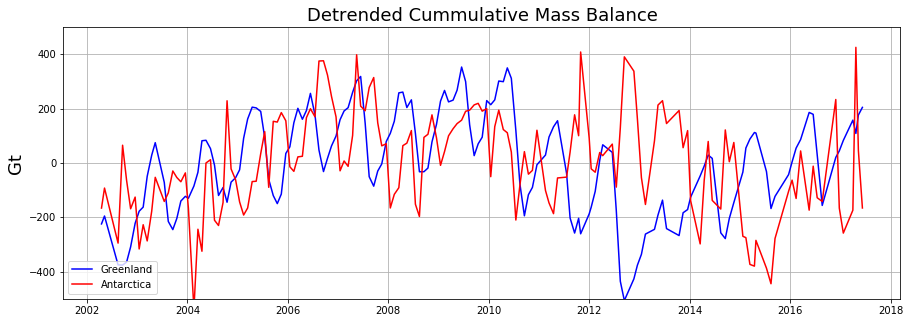

In [4]:
# Subtract trends
g_detrend = mb_g - g_trend
a_detrend = mb_a - a_trend

# Plot detrended timeseries
fig = plt.figure(figsize=(15,5))
plt.plot(mb_time, g_detrend, 'b', label='Greenland')
plt.plot(mb_time, a_detrend, 'r', label='Antarctica')
plt.legend(loc='lower left')
plt.grid()
plt.ylim([-500, 500])
plt.title("Detrended Cummulative Mass Balance", fontsize=18)
plt.ylabel("Gt", fontsize=18)

# Problem 4.
### The accelration terms for these time series are -3.0 and -5.0 $Gt/yr^{2}$ for Greenland and Antarctica respectively. I do believe a quadratic fit better captures the GRACE observations particularly near the begining of the time series, where the linear fit seems to suggest too high of a cumulative mass balance for both ice sheets. Additionally in the middle of the timeseries, the quadratic fit seems to better capture the observations for both ice sheets.

-3.038661992135615
-5.028270698591011


Text(0, 0.5, 'Gt')

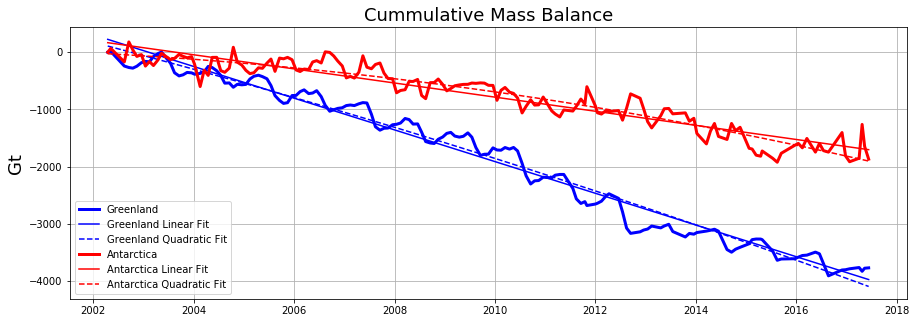

In [5]:
# Calculate quadtratic fit
g_qf = np.polyfit(mb_time, mb_g, 2)
print(g_qf[0])
g_qf = np.polyval(g_qf, mb_time)
a_qf = np.polyfit(mb_time, mb_a, 2)
print(a_qf[0])
a_qf = np.polyval(a_qf, mb_time)

# Plot linear and quadratic trends
g_trend = g_intercept + mb_time * g_slope
a_trend = a_intercept + mb_time * a_slope
fig = plt.figure(figsize=(15,5))
plt.plot(mb_time, mb_g, 'b', linewidth=3, label='Greenland')
plt.plot(mb_time, g_trend, 'b-', label='Greenland Linear Fit')
plt.plot(mb_time, g_qf, 'b--', label='Greenland Quadratic Fit')
plt.plot(mb_time, mb_a, 'r', linewidth=3, label='Antarctica')
plt.plot(mb_time, a_trend, 'r', label='Antarctica Linear Fit')
plt.plot(mb_time, a_qf, 'r--', label='Antarctica Quadratic Fit')
plt.legend(loc='lower left')
plt.grid()
plt.title("Cummulative Mass Balance", fontsize=18)
plt.ylabel("Gt", fontsize=18)

# Problem 5. 
### The two mass balance methods look very similar in terms of their overall trends. Owing to the larger temporal resolution, GRACE is able to resolve sub annual variability in Greenland mass balance. Their appears to be a kink in the input-output method data in 2012, probably due the large negative SMB anomaly that year. Additionally both methods appear to show an acceleration in mass loss with time.

Text(0, 0.5, 'Gt')

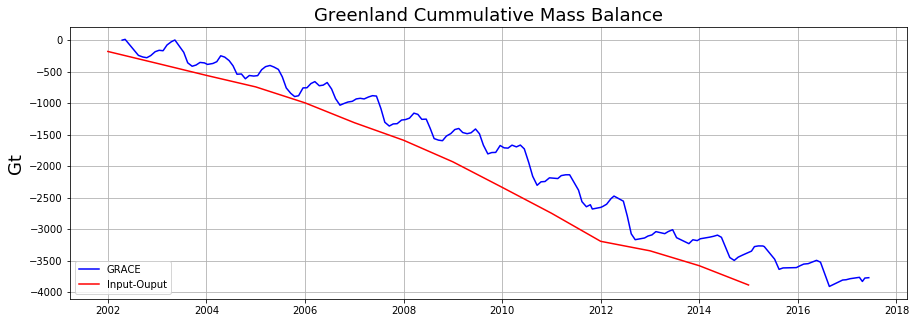

In [6]:
# Greenland Ice Sheet mass balance
fig = plt.figure(figsize=(15,5))
plt.plot(mb_time, mb_g, 'b', label='GRACE')
plt.plot(g_time[44:], np.cumsum(gsmb[44:] - gd[44:]), 'r', label='Input-Ouput')
plt.legend(loc='lower left')
plt.grid()
plt.title("Greenland Cummulative Mass Balance", fontsize=18)
plt.ylabel("Gt", fontsize=18)

# Problem 6. 
### GRACE estimates Greenland Mass Balance as -277 Gt/yr. In the pre-GRACE era average SMB was 390 Gt/yr and discharge was 414 Gt/yr. In the GRACE era average SMB decreased by 150 Gt/yr to 240 Gt/yr while discharge increased 104 Gt/yr to 518 Gt/yr. An decrease in SMB of 150 Gt/yr explains ~54% of the observed mass loss while an increase in discharge of 104 Gt/yr explains ~38% of the observed mass loss.

Pre-GRACE mean Greenland SMB = 389.84704545454537 Gt/yr
Pre-GRACE mean Greenland Discharge = 414.3402272727273 Gt/yr

GRACE era mean Greenland SMB = 240.4192857142857 Gt/yr
GRACE era mean Greenland Discharge = 518.0564285714285 Gt/yr

GRACE era typical Greenland Mass Balance  = -277.2155924316179 Gt/yr


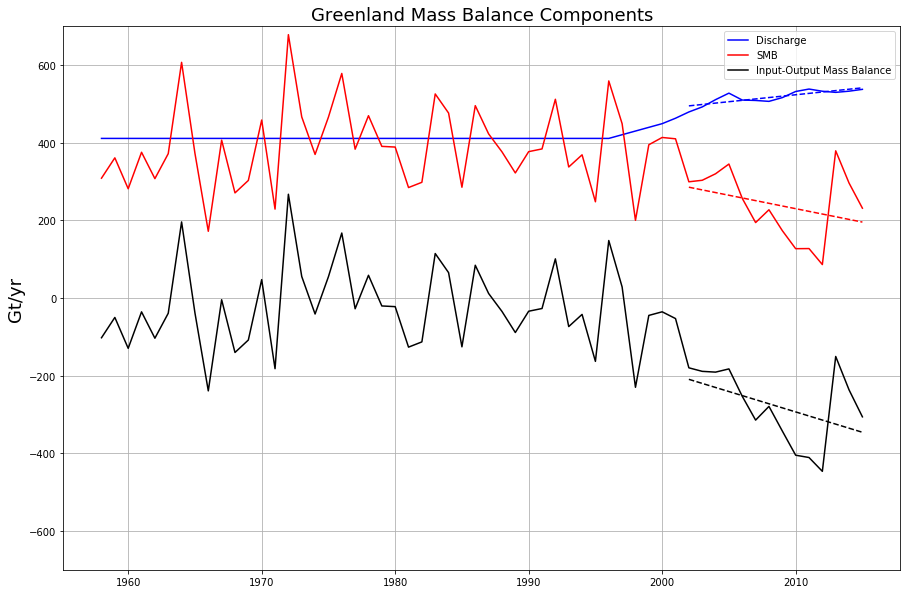

In [7]:
# Calculate SMB, discharge, and mass balance trends from input-ouput method 
# during the GRACE record. 
smb_slope, smb_intercept, smb_r_value, smb_p_value, smb_std_err = \
    stats.linregress(g_time[44:], gsmb[44:])
d_slope, d_intercept, d_r_value, d_p_value, d_std_err = \
    stats.linregress(g_time[44:], gd[44:])
iomb_slope, iomb_intercept, iomb_r_value, iomb_p_value, iomb_std_err = \
    stats.linregress(g_time[44:], gsmb[44:] - gd[44:])

# Greenland ice sheet mass balacne components
fig = plt.figure(figsize=(15,10))
plt.plot(g_time, gd, 'b', label='Discharge')
plt.plot(g_time[44:], d_intercept + g_time[44:] * d_slope, 'b--' )
plt.plot(g_time, gsmb, 'r', label='SMB')
plt.plot(g_time[44:], smb_intercept + g_time[44:] * smb_slope, 'r--' )
plt.plot(g_time, gsmb - gd, 'k', label='Input-Output Mass Balance')
plt.plot(g_time[44:], iomb_intercept + g_time[44:] * iomb_slope, 'k--' )
plt.legend()
plt.ylim([-700, 700])
plt.grid()
plt.title("Greenland Mass Balance Components", fontsize=18)
plt.ylabel("Gt/yr", fontsize=18)

# Calculate mean SMB and discharge before GRACE timeseries
print("Pre-GRACE mean Greenland SMB = " + str(gsmb[:44].mean()) + " Gt/yr")
print("Pre-GRACE mean Greenland Discharge = " + str(gd[:44].mean()) + " Gt/yr")
print()

# Calculate mean SMB and discharge durring GRACE timeseries
print("GRACE era mean Greenland SMB = " + str(gsmb[44:].mean()) + " Gt/yr")
print("GRACE era mean Greenland Discharge = " + str(gd[44:].mean()) + " Gt/yr")
print()

# Print GRACE era Greenland mass balance
print("GRACE era typical Greenland Mass Balance  = " + str(g_slope) + " Gt/yr")